# **Titanic Survival Prediction**

# 1. Import required Libraries 

In [84]:
import pandas as pd

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

# 2. Import the Data

In [85]:
titanic = pd.read_csv(r"C:\Users\Admin\Downloads\archive (5)\Titanic-Dataset.csv")

In [86]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [87]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. Data description
Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

Survived: 0 = Did not survive, 1 = Survived

Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

Sex: Male or female

Age: Age in years, fractional if less than 1

SibSp: Number of siblings or spouses aboard the titanic

Parch: Number of parents or children aboard the titanic

Ticket: Passenger ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton  

# 4. EDA 

In [88]:
titanic.shape

(891, 12)

In [89]:
# checking of null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
titanic = titanic.drop(['Name'], axis = 1)

In [92]:
titanic = titanic.drop(['Ticket'], axis = 1)

In [93]:
titanic = titanic.drop(['Cabin'], axis = 1)

In [94]:
titanic = titanic.drop(['PassengerId'], axis = 1)

# Note : 
So i have decided to drop Name, Ticket, Cabin and passanger ID these columns, as they don't be needed to predict the survival.

In [95]:
# Value counts of the Embarked column 
titanic['Embarked'].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [96]:
titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Embarked Point')

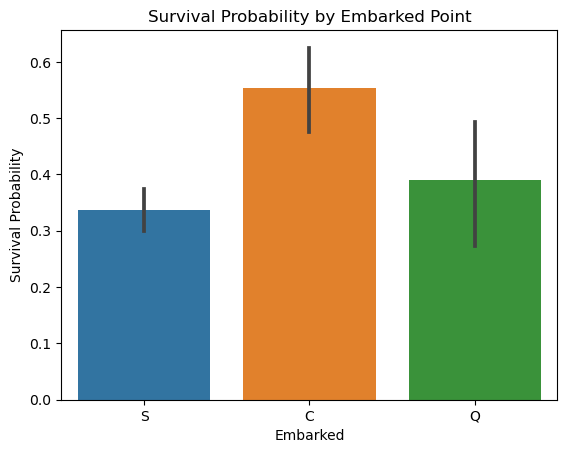

In [97]:
sns.barplot(x = 'Embarked', y ='Survived', data = titanic)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Embarked Point')

Survival Probability at point C is maximum and lowest at point at S.

- We can see that the majority of passangers embarked from point C and have highest survival probability.
- alternatively, the passangers embarked from point S are low in numbers and hence point S has lowest survival probability.

In [98]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [99]:
tc =  titanic

In [100]:
tc.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [101]:
tc.Embarked.nunique()
tc.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [102]:
tc.Age.unique()
tc.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [104]:
tc.Age = le.fit_transform(tc.Age)
tc.Embarked = le.fit_transform(tc.Embarked)

In [105]:
tc

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,28,1,0,7.2500,2
1,1,1,female,51,1,0,71.2833,0
2,1,3,female,34,0,0,7.9250,2
3,1,1,female,47,1,0,53.1000,2
4,0,3,male,47,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,male,35,0,0,13.0000,2
887,1,1,female,24,0,0,30.0000,2
888,0,3,female,88,1,2,23.4500,2
889,1,1,male,34,0,0,30.0000,0


In [106]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 52.3+ KB


In [107]:
tc.Sex.replace({'female':0, 'male':1}, inplace = True)

In [108]:
tc

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,28,1,0,7.2500,2
1,1,1,0,51,1,0,71.2833,0
2,1,3,0,34,0,0,7.9250,2
3,1,1,0,47,1,0,53.1000,2
4,0,3,1,47,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,35,0,0,13.0000,2
887,1,1,0,24,0,0,30.0000,2
888,0,3,0,88,1,2,23.4500,2
889,1,1,1,34,0,0,30.0000,0


# 5. Modeling
- 1. Logistic Regression
- 2. Decision Tree
- 3. Random Forest

In [220]:
# logisic regression

In [221]:
from sklearn.model_selection import train_test_split
tc_train, tc_test = train_test_split(tc, test_size =.2)

In [222]:
tc_train_x = tc_train.drop(['Survived'], axis = 1)
tc_train_y = tc_train.Survived

tc_test_x = tc_test.drop(['Survived'], axis = 1)
tc_test_y = tc_test.Survived

In [223]:
# here from train data 'Survived' is droped as it is a our Target Vriable, and hence it istaken into test data.

In [224]:
from sklearn.linear_model import LogisticRegression
logreg_tc = LogisticRegression()
logreg_tc.fit(tc_train_x, tc_train_y)
pred_test = logreg_tc.predict(tc_test_x)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(tc_test_y, pred_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[101,  13],
       [ 18,  47]], dtype=int64)

In [225]:
print(classification_report(tc_test_y, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       114
           1       0.78      0.72      0.75        65

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.83      0.83       179



In [226]:
# decision tree

In [227]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [228]:
dt.fit(tc_train_x, tc_train_y)
pred_test_dt = dt.predict(tc_test_x)
confusion_matrix(tc_test_y, pred_test_dt)

array([[82, 32],
       [15, 50]], dtype=int64)

In [229]:
print(classification_report(tc_test_y, pred_test_dt))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       114
           1       0.61      0.77      0.68        65

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.76      0.74      0.74       179



In [230]:
# random forest

In [231]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [232]:
rfc.fit(tc_train_x, tc_train_y)
pred_test_rfc = dt.predict(tc_test_x)
confusion_matrix(tc_test_y, pred_test_rfc)

array([[82, 32],
       [15, 50]], dtype=int64)

In [233]:
print(classification_report(tc_test_y, pred_test_rfc))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       114
           1       0.61      0.77      0.68        65

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.76      0.74      0.74       179



# The metrics explains:

- Precision: Precision focuses on the accuracy of the positive predictions, regardless of how many actual positive instances there are in the dataset. It tells us what proportion of positive predictions made by the model are actually correct.

- Recall (sensitivity): It measures the ability of the model to capture all the positive values. It tells you what proportion of actual positives was identified correctly. 

- F1-score: This is the harmonic mean of precision and recall. It's a single metric that gives you an idea of the balance between precision and recall. 

- Accuracy: This is the overall accuracy of the model, which is the proportion of correctly predicted instances out of the total instances. 

Overall, it seems like the model performs reasonably well, with good precision, recall, and F1-score for both classes, and a overall accuracy is good.

# here, 

1. Precision : For class 0 precision is 0.85, and for class 1 precision is 0.78. 

2. Recall : For the class 0, the recall is 0.89, and for the class 1, the recall is 0.72. It tells us that the model correctly identified 89% of all actual class 0 instances and 72% of all actual class 1 instances.

3. F1-score : For the class 0, the F1-score is 0.87, and for the class 1, the F1-score is 0.75. A high F1-score indicates that the model has both good precision and recall.

4. Accuracy : The overall accuracy of the model is 0.83, meaning it correctly predicted 83% of the instances in the dataset.

# 6. Conclusion

In [234]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 'Random Forest'],
    'Score': [0.83, 0.74, 0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.83,Logistic Regression
0.74,Decision Tree
0.74,Random Forest


# Hence I will use Logistic Regression algorithm for training my model.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. 
Let's help each other get better 
happy learning!

# 7. Possible extensions to improve model accuracy

1. Analyse columns/features such as ticket and cabin features
- If ticket and cabin these features help to predict passenger survival then only consider them, otherwise you can drop it.
2. Search for alternative features in feature engineering
- Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
- It helps with the problem of overfitting.